In [27]:
import pandas as pd
df = pd.read_csv('/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/csvs/smallGrid/TrueOnlineSarsaL9_simple_3000.csv')

In [28]:
df = df.groupby(['Episode'], as_index = False).mean()

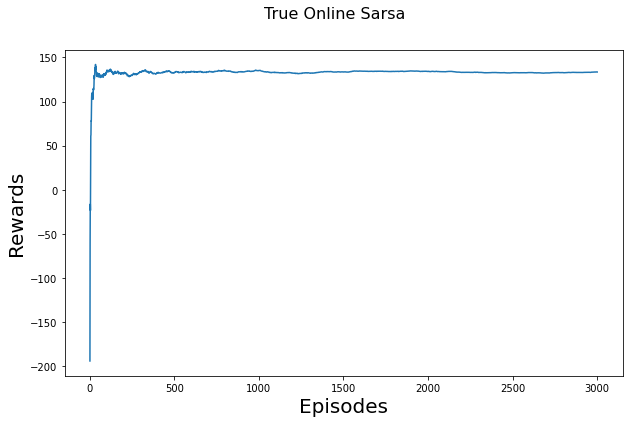

In [29]:
import matplotlib.pyplot as plt

# set up a plot with dummy data
fig, ax = plt.subplots(figsize=(10, 6))
x = df["Episode"]
y = df["Avgreward"].rolling(window=1).mean()
# y = df["Rewards"]
ax.plot(x,y)

# title and labels, setting initial sizes
fig.suptitle('True Online Sarsa', fontsize=16)
ax.set_xlabel('Episodes', fontsize='20')
ax.set_ylabel('Rewards', fontsize='20')   # relative to plt.rcParams['font.size']

# setting label sizes after creation
# ax.xaxis.label.set_size(20)
# plt.ylim([0, 1])
plt.show()

In [10]:
import pandas as pd
df = pd.read_csv('/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/csvs/TrueOnlineSarsaAgent_mediumGrid_SimpleExtractor_0-5_0-05_0-2_0-8.csv')

In [11]:
df = df.groupby(['Episode'], as_index = False).mean()

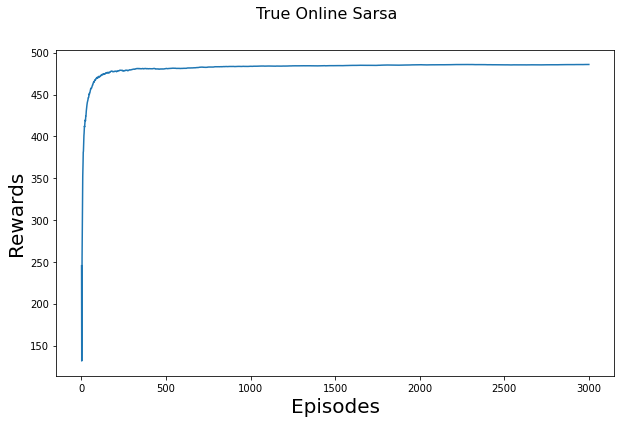

In [13]:
import matplotlib.pyplot as plt

# set up a plot with dummy data
fig, ax = plt.subplots(figsize=(10, 6))
x = df["Episode"]
y = df["AvgRewards"].rolling(window=1).mean()
# y = df["Rewards"]
ax.plot(x,y)

# title and labels, setting initial sizes
fig.suptitle('True Online Sarsa', fontsize=16)
ax.set_xlabel('Episodes', fontsize='20')
ax.set_ylabel('Rewards', fontsize='20')   # relative to plt.rcParams['font.size']

# setting label sizes after creation
# ax.xaxis.label.set_size(20)
# plt.ylim([0, 1])S
plt.show()

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import glob


In [5]:
def plotGraphLamdas(csvFolder):
    plt.rcParams.update({'font.size': 60})
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize=(80, 65))
    for i, csvFile in enumerate(glob.glob(csvFolder+'/*.csv')):
        # csvFile = Agent_layout_extractor_lamda_epsilon_lr_gamma
        col = colors[i]
        df = pd.read_csv(str(csvFile))
        df = df.groupby(['Episode'], as_index = False).mean()
        x = df["Episode"]
        y = df["AvgRewards"]

        data = str(csvFile).replace('-', '.').split('_')
        lamda, eps, lr, gamma = data[3], data[4], data[5], data[6]
        labelData = f"lamda: {lamda}, epsilon: {eps}, learning rate: {lr}, discount: {gamma}"
        
        plt.plot(x,y, color=col, label=labelData, linewidth=5)

    plt.xlabel("Episodes -->")
    plt.ylabel("AvgRewards --> ")
    plt.title("True Online SARSA with different lamda values")
    plt.legend()
    plt.show()

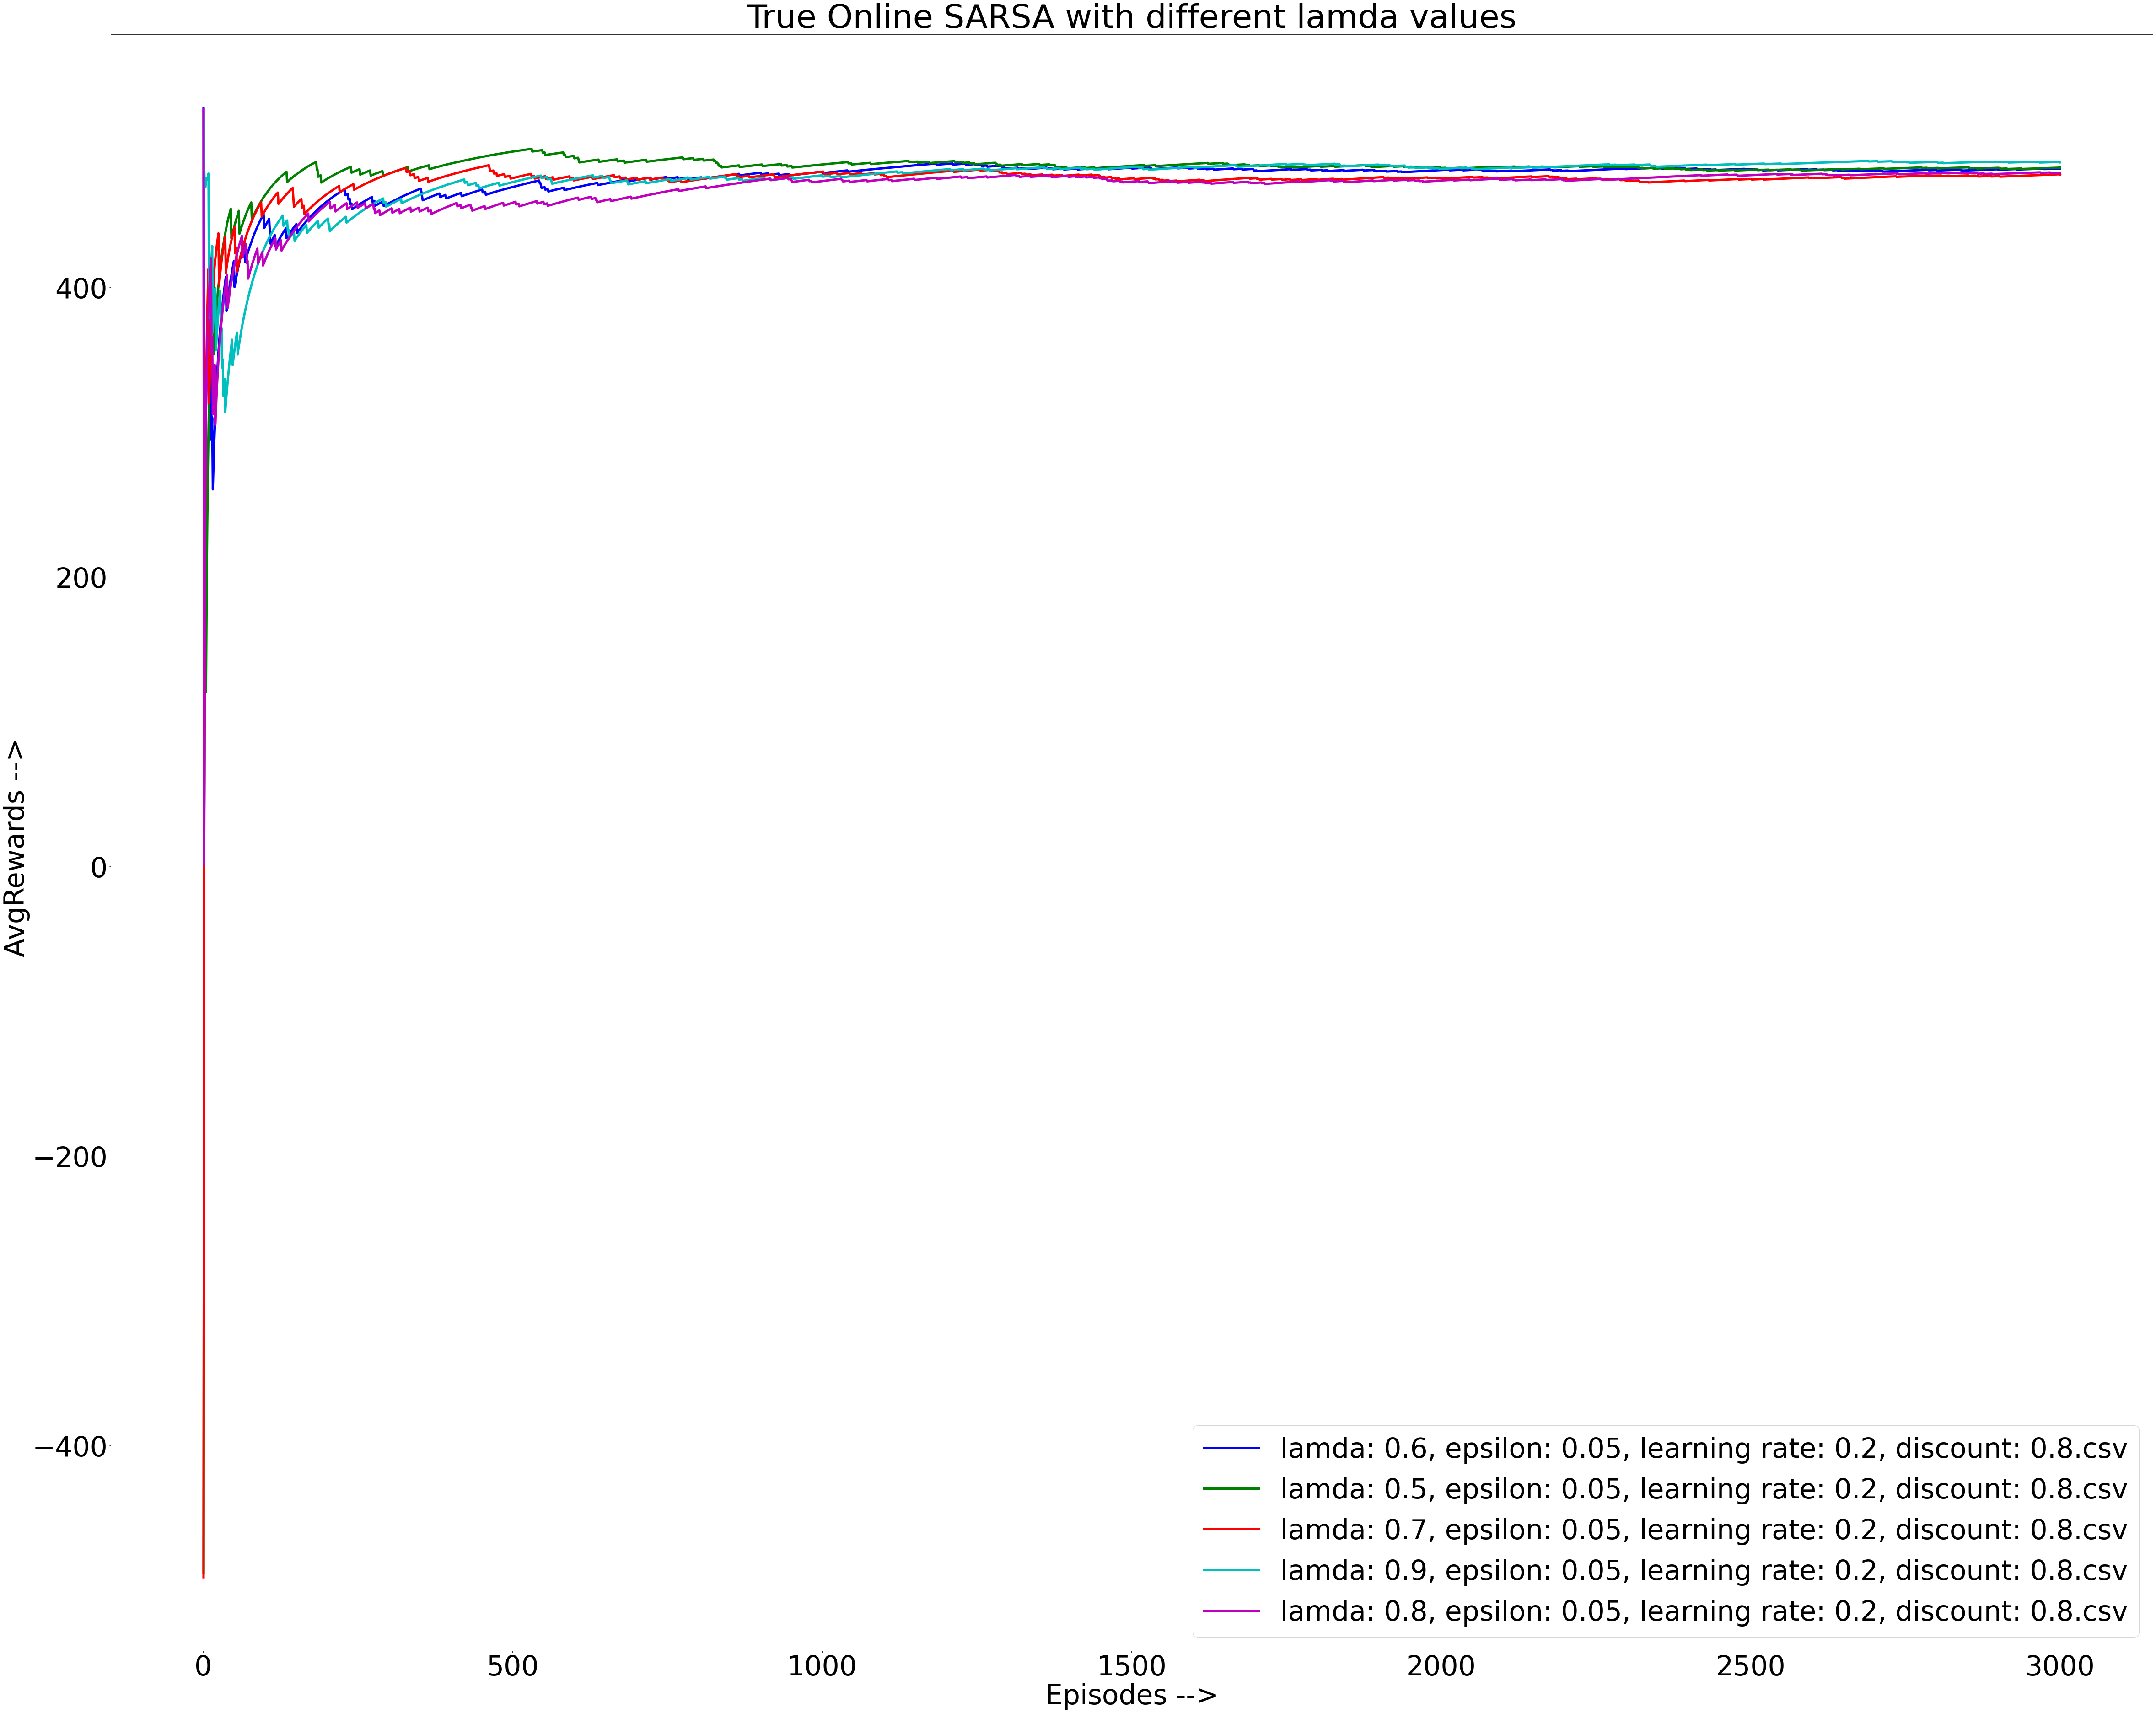

In [6]:
plotGraphLamdas("/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/csvs/TrueOnlineSARSALamdas")

In [4]:
def plotGraphLamdas(csvFolder):
    plt.rcParams.update({'font.size': 60})
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize=(80, 65))
    for i, csvFile in enumerate(glob.glob(csvFolder+'/*.csv')):
        # csvFile = Agent_layout_extractor_lamda_epsilon_lr_gamma
        col = colors[i]
        df = pd.read_csv(str(csvFile))
        df['Episode'] = df['Episode'][:6000]
        df['AvgRewards'] = df['AvgRewards'][:3000]
        df = df.groupby(['Episode'], as_index = False).mean()
        x = df["Episode"]
        y = df["AvgRewards"]

        data = str(csvFile).replace('-', '.').split('_')
        lamda, eps, lr, gamma = data[3], data[4], data[5], data[6]
        labelData = f"lamda: {lamda}, epsilon: {eps}, learning rate: {lr}, discount: {gamma}"
        
        plt.plot(x,y, color=col, label=labelData, linewidth=5)

    plt.xlabel("Episodes -->")
    plt.ylabel("AvgRewards --> ")
    plt.title("True Online SARSA with different lamda values")
    plt.legend()
    plt.show()

In [8]:
import subprocess
AGENTS = ["TrueOnlineSarsaAgent", "ApproximateQAgent"]

In [11]:
def createDirectories(layouts):
    layout = layouts[0] # change
    if not glob.glob(f"generatedLayouts"):
        x = subprocess.Popen(f"mkdir generatedLayouts".split())
        x.wait()
    if not glob.glob(f"generatedLayouts/{layout}"):
        x = subprocess.Popen(f"mkdir generatedLayouts/{layout}".split())
        x.wait()
    if not glob.glob(f"generatedLayouts/{layout}/csvs/"):
        x = subprocess.Popen(f"mkdir generatedLayouts/{layout}/csvs/".split())
        x.wait()
    if not glob.glob(f"generatedLayouts/{layout}/plots/"):
        x = subprocess.Popen(f"mkdir generatedLayouts/{layout}/plots/".split())
        x.wait()

In [89]:
def mergeCSVs(layouts):
    layout_name = 'mediumGrid' # change
    layout_case = layouts[0] # change
    mergedCSVs = []
    for agent in AGENTS:
        csvFolder = f"./generatedLayouts/{layout_case}/csvs/"
        mergedCsvFile = f"./generatedLayouts/{layout_case}/csvs/{agent}_{layout_name}_merged.csv"
        if glob.glob(mergedCsvFile):
            x = subprocess.Popen(f"rm {mergedCsvFile}".split())
            x.wait()
        df = pd.DataFrame({"Episode": [], "AvgRewards": [], "EpisodeRewards": []})
        for i, csvFile in enumerate(glob.glob(csvFolder+'*.csv')):
            if agent not in csvFile: 
                continue
            new_df = pd.read_csv(csvFile, index_col=0)
            df = pd.concat([df, new_df], ignore_index=True)
        df.to_csv(mergedCsvFile)
        mergedCSVs.append(mergedCsvFile)
    return mergedCSVs

In [178]:
layouts = ['originalClassic']

In [91]:
createDirectories(layouts)
mergeCSVs(layouts)

['./generatedLayouts/exampleCase/csvs/TrueOnlineSarsaAgent_mediumGrid_merged.csv',
 './generatedLayouts/exampleCase/csvs/ApproximateQAgent_mediumGrid_merged.csv']

In [ ]:
def plotGraphs(layouts):
    layout_name = layouts[0]

In [63]:
def plotGraphLamdas(csvFolder):
    plt.rcParams.update({'font.size': 60})
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure(figsize=(80, 65))
    for i, csvFile in enumerate(glob.glob(csvFolder+'/*.csv')):
        # csvFile = Agent_layout_extractor_lamda_epsilon_lr_gamma
        col = colors[i]
        df = pd.read_csv(str(csvFile))
        df['Episode'] = df['Episode'][:6000]
        df['AvgRewards'] = df['AvgRewards'][:3000]
        df = df.groupby(['Episode'], as_index = False).mean()
        x = df["Episode"]
        y = df["AvgRewards"]

        data = str(csvFile).replace('-', '.').split('_')
        lamda, eps, lr, gamma = data[3], data[4], data[5], data[6]
        labelData = f"lamda: {lamda}, epsilon: {eps}, learning rate: {lr}, discount: {gamma}"
        
        plt.plot(x,y, color=col, label=labelData, linewidth=5)

    plt.xlabel("Episodes -->")
    plt.ylabel("AvgRewards --> ")
    plt.title("True Online SARSA with different lamda values")
    plt.legend()
    
    plt.show()

In [100]:
plt.rcParams.update({'font.size': 10})

In [224]:
def plotGraphAgents(SarsaCsv, qLearnCsv, file):
    # file = file[:-4]
    # alldata = file.split('/')[-1].split('_')[1:]
    plt.figure(figsize=(10, 10))
    # layout_name = ''.join(alldata)
    # print(layout_name)
    
    # layout_case  = file.split('/')[2]
    sarsa_df = pd.read_csv(str(SarsaCsv))
    qLearn_df = pd.read_csv(str(qLearnCsv))
    sarsa_df = sarsa_df.groupby(['Episode'], as_index = False).mean()
    qLearn_df = qLearn_df.groupby(['Episode'], as_index = False).mean()
    sarsa_x = sarsa_df["Episode"]
    sarsa_y = sarsa_df["AvgRewards"]
    qlearn_x = qLearn_df["Episode"]
    qlearn_y = qLearn_df["AvgRewards"]
    # sarsa_df.head()
    # qLearn_df.head()

    # sarsalabelData = f"agent: TrueOnlineSarsaAgent, layout: {layout_name}"
    # qLearnlabelData = f"agent: ApproximateQAgent, layout: {layout_name}"
    
    plt.plot(sarsa_x, sarsa_y, color='r', linewidth=1)
    plt.plot(qlearn_x, qlearn_y, color='b', linewidth=1)

    # plt.savefig(f'./plots/SARSAvsQlearn_{layout_name}')
    plt.show()

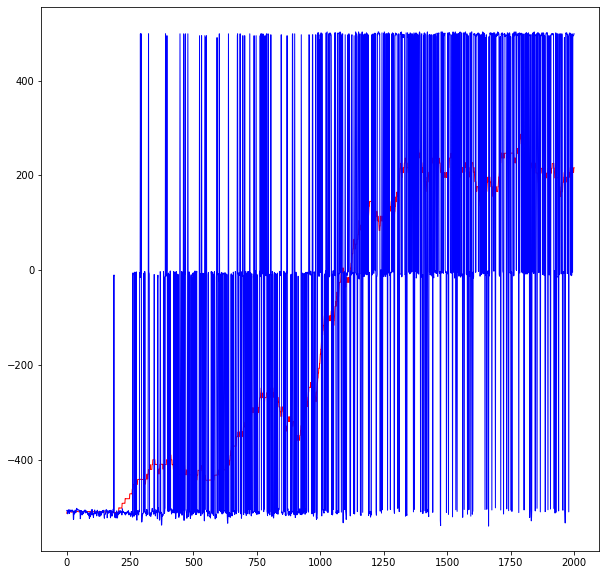

In [225]:
plotGraphAgents("/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/csvs/cc.csv", "/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/csvs/dd.csv", None)

In [211]:
def plotGraphs(layouts):
    layout_case = layouts[0]
    csvFolder = f"/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/layouts/generatedLayouts/originalClassic_cp/csvs"
    print(csvFolder)
    files = list(glob.glob(csvFolder+'/*.csv'))
    print(files)
    for file in files:
        
        print(layout_case)
        if 'TrueOnlineSarsaAgent' in file:
            approxQAgent = file.replace('TrueOnlineSarsaAgent', 'ApproximateQAgent')
            if approxQAgent in files:
                plotGraphAgents(file, approxQAgent, file)
                files.remove(approxQAgent)
            files.remove(file)

/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/layouts/generatedLayouts/originalClassic_cp/csvs
['/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/layouts/generatedLayouts/originalClassic_cp/csvs/TrueOnlineSarsaAgent_originalClassic_SimpleExtractor_0-5.csv', '/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/layouts/generatedLayouts/originalClassic_cp/csvs/ApproximateQAgent_originalClassic_merged.csv', '/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/layouts/generatedLayouts/originalClassic_cp/csvs/TrueOnlineSarsaAgent_originalClassic_merged.csv', '/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/layouts/generatedLayouts/originalClassic_cp/csvs/ApproximateQAgent_originalClassic_SimpleExtractor_0-5.csv']
originalClassic
originalClassicSimpleExtractor0-5


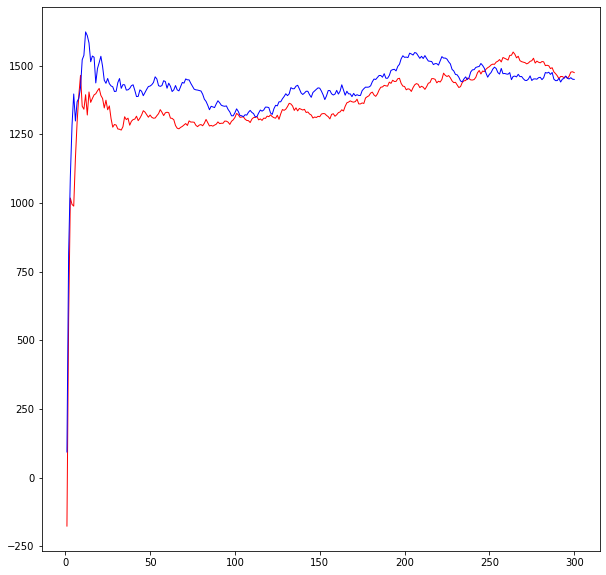

originalClassic
originalClassicmerged


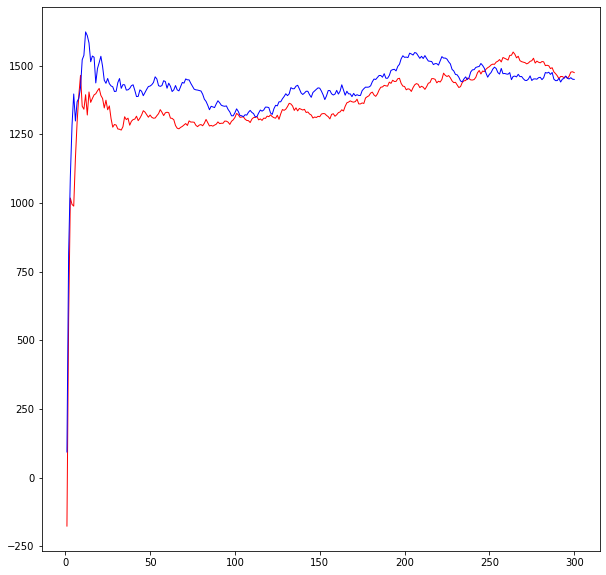

In [212]:
plotGraphs(layouts)
plt.show()

In [12]:
import pandas as pd


In [4]:
def convergenceEstimator(sarsa, q):
    episodes = 3000
    sarsa_df = pd.read_csv(sarsa, index_col = 0)
    q_df = pd.read_csv(q, index_col = 0)
    totalRows = int(len(df))
    ConvergedEps = []
    sarsa_idealRewards = sum(sarsa_df['EpisodeRewards'][totalRows-100:totalRows]) / 100
    q_idealRewards = sum(q_df['EpisodeRewards'][totalRows-100:totalRows]) / 100
    run = 1
    epi = 0
    while epi < len(df['Episode']):
        if (sum(sarsa_df['EpisodeRewards'][epi:epi+10]) / 10) > sarsa_idealRewards-50 and \
            (sum(sarsa_df['EpisodeRewards'][epi:epi+10]) / 10) < sarsa_idealRewards+50:
            ConvergedEps.append(epi+1 - ((run-1) * episodes))
            epi = run * episodes
            run += 1
            continue
        epi += 1
    return ConvergedEps
    

In [6]:
sarsaCsv = convergenceEstimator("/home/yashas/Desktop/CSE571/TeamProject/4.reinforcement/layouts/generatedLayouts/originalClassic_cp/csvs/TrueOnlineSarsaAgent_originalClassic_merged.csv")

[4, 3]

In [9]:
import glob

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import argparse

def plotGraphAgents(SarsaCsv, qLearnCsv):
    # remove .csv
    # print(SarsaCsv, qLearnCsv)
    plt.figure()
    file = SarsaCsv[:-4]
    # csvFile = f"csvs/{agent}_{layout_str}_{args.extractor}_{lamda_str}"
    layout_name = file.split('/')[-1].split('_')[1]    
    # layout_name = ''.join(alldata)
    
    sarsa_df = pd.read_csv(str(SarsaCsv))
    qLearn_df = pd.read_csv(str(qLearnCsv))
    sarsa_df = sarsa_df.groupby(['Episode'], as_index = False).mean()
    qLearn_df = qLearn_df.groupby(['Episode'], as_index = False).mean()
    sarsa_x = sarsa_df["Episode"]
    sarsa_y = sarsa_df["AvgRewards"]
    qlearn_x = qLearn_df["Episode"]
    qlearn_y = qLearn_df["AvgRewards"]

    sarsalabelData = f"agent: TrueOnlineSarsaAgent, layout: {layout_name}"
    qLearnlabelData = f"agent: ApproximateQAgent, layout: {layout_name}"
    
    plt.plot(sarsa_x, sarsa_y, color='r', label=sarsalabelData)
    plt.plot(qlearn_x, qlearn_y, color='b', label=qLearnlabelData)
    plt.title("TrueOnlineSarsaAgent vs ApproximateQAgent")
    plt.legend()

    plt.savefig(f'./plots/SARSAvsQ_{layout_name}')


def plotGraphs(layouts):
    # print(layouts)
    csvFolder = f"csvs/"
    files = list(glob.glob(csvFolder+'/*.csv'))
    for file in files:
        layout_name = file[:-4].split('/')[-1].split('_')[1]
        # print(layout_name)
        if layout_name in layouts:
            if 'TrueOnlineSarsaAgent' in file:
                approxQAgent = file.replace('TrueOnlineSarsaAgent', 'ApproximateQAgent')
                if approxQAgent in files:
                    plotGraphAgents(file, approxQAgent)





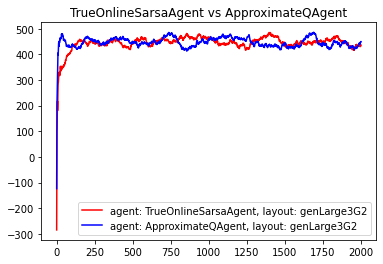

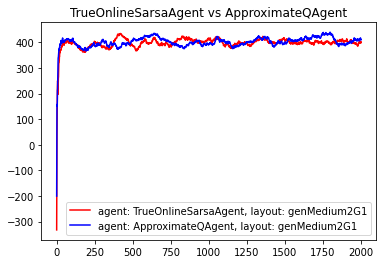

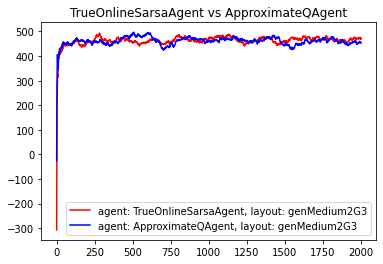

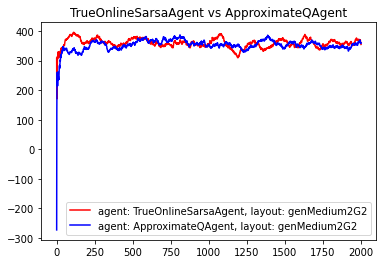

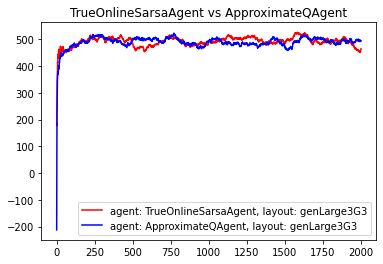

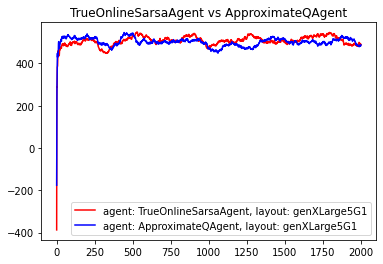

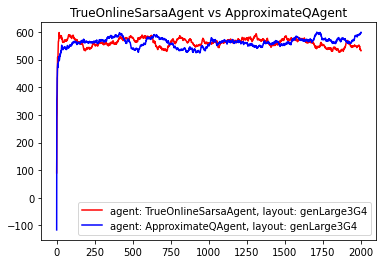

In [4]:

if __name__ == '__main__':
    # parser = argparse.ArgumentParser()
    # parser.add_argument('-l', '--layouts', dest='layouts',
    #               help='Comma separated layouts. e.g. "smallGrid,mediumGrid"', default="smallGrid")
    # args = parser.parse_args()
    # layouts = args.layouts.split(',')
    layouts = ['genLarge3G2','genLarge3G3','genLarge3G4','genMedium2G1','genMedium2G2','genMedium2G3','genXLarge5G1']
    plotGraphs(layouts)
